# Fake/Real News Classification
reference: https://www.kaggle.com/code/jonathanlam1014/fake-news-headlines-classification

In [45]:
import numpy as np 
import pandas as pd 

## load dataset

In [46]:
#Read Dataset
Headlines = pd.read_csv('./input/abcnews-date-text.csv', usecols =["headline_text"]).dropna()
Fake = pd.read_csv('./input/Fake.csv', usecols =["title"]).dropna()
Real = pd.read_csv('./input/True.csv', usecols =["title"]).dropna()
Fake2 = pd.read_csv('./input/Fake 2.csv', usecols =["title"]).dropna()

In [47]:
#Removing duplicated headlines
Headlines = Headlines.drop_duplicates('headline_text')
Fake = Fake.drop_duplicates('title')
Real = Real.drop_duplicates('title')
Fake2 = Fake2.drop_duplicates('title')

In [48]:
Headlines['fake'] = 0
Fake['fake'] = 1
Real['fake'] = 0
Fake2['fake'] = 1

In [49]:
# Downsize million-headlines dataset to first 50K rows
Headlines = Headlines.head(50000)
train = pd.concat([Fake, Real, Fake2], ignore_index=True)
train = train.rename(columns={'title': 'headline_text'})
print('Training dataset contains: {} Real headlines and {} Fake headlines.'.format(len(Real),len(Fake)+len(Fake2)))

Training dataset contains: 20826 Real headlines and 29601 Fake headlines.


In [50]:
%pip install gensim nltk scikit-learn

import gensim
import nltk as nl
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

nltk_stopwords = nl.corpus.stopwords.words('english')
gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS
sklearn_stopwords = ENGLISH_STOP_WORDS
combined_stopwords = sklearn_stopwords.union(nltk_stopwords, gensim_stopwords)

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Note: you may need to restart the kernel to use updated packages.


In [51]:
print('NLTK has {} stop words'.format(len(nltk_stopwords)))
print('Gensim has {} stop words'.format(len(gensim_stopwords)))
print('Sklearn has {} stop words'.format(len(sklearn_stopwords)))
print('Combined stopwords list has {} stop words'.format(len(combined_stopwords)))

NLTK has 179 stop words
Gensim has 337 stop words
Sklearn has 318 stop words
Combined stopwords list has 390 stop words


In [52]:
from nltk.stem import PorterStemmer 
porter_stemmer = PorterStemmer() 

In [53]:
train['headline_text'] = train['headline_text'].apply(lambda x: x.lower())
train['headline_text'] = train['headline_text'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
train['headline_text'] = train['headline_text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
train['headline_text'] = train['headline_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (combined_stopwords)]))

In [54]:
train.head()

,headline_text,fake
0,donald trump send embarrass new eve thi disturb,1
1,drunk brag trump staffer start russian collus ...,1
2,sheriff david clark becom internet joke threat...,1
3,trump obsess ha code hi websit,1
4,pope franci donald trump dure hi christma speech,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train['headline_text'], train['fake'], test_size=0.2, random_state=42)

In [60]:
test = pd.concat([Headlines], ignore_index=True)

## Construct model use TF-IDF

In [56]:
# construct models use TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten, Embedding, GlobalMaxPooling1D
# from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import GRU

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
tfidf_vectorizer = TfidfVectorizer(tokenizer = word_tokenize, max_features = 300)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)
tfidf_features = tfidf_vectorizer.get_feature_names_out()

C:\Users\zoezh\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [58]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC(kernel='linear')
knn = KNeighborsClassifier()
nb = MultinomialNB()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()


dt.fit(tfidf_train, y_train)
rf.fit(tfidf_train, y_train)
svc.fit(tfidf_train, y_train)
knn.fit(tfidf_train, y_train)
nb.fit(tfidf_train, y_train)
gb.fit(tfidf_train, y_train)
ada.fit(tfidf_train, y_train)
xgb.fit(tfidf_train, y_train)
lgbm.fit(tfidf_train, y_train)

C:\Users\zoezh\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 23662, number of negative: 16679
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33018
[LightGBM] [Info] Number of data points in the train set: 40341, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.586550 -> initscore=0.349720
[LightGBM] [Info] Start training from score 0.349720


LGBMClassifier()

In [59]:
print ("Testing Acc. of Decision Tree: {} %".format(round(dt.score(tfidf_test, y_test) * 100, 2)))
print ("Testing Acc. of Random Forest: {} %".format(round(rf.score(tfidf_test, y_test) * 100, 2)))
print ("Testing Acc. of SVC: {} %".format(round(svc.score(tfidf_test, y_test) * 100, 2)))
print ("Testing Acc. of K-NN: {} %".format(round(knn.score(tfidf_test, y_test) * 100, 2)))
print ("Testing Acc. of Naive Bayesian: {} %".format(round(nb.score(tfidf_test, y_test) * 100, 2)))
print ("Testing Acc. of Gradient Boosting: {} %".format(round(gb.score(tfidf_test, y_test) * 100, 2)))
print ("Testing Acc. of AdaBoost: {} %".format(round(ada.score(tfidf_test, y_test) * 100, 2)))
print ("Testing Acc. of XGBoost: {} %".format(round(xgb.score(tfidf_test, y_test) * 100, 2)))
print ("Testing Acc. of LGBM: {} %".format(round(lgbm.score(tfidf_test, y_test) * 100, 2)))


Testing Acc. of Decision Tree: 76.46 %
Testing Acc. of Random Forest: 80.23 %
Testing Acc. of SVC: 80.29 %
Testing Acc. of K-NN: 77.38 %
Testing Acc. of Naive Bayesian: 80.15 %
Testing Acc. of Gradient Boosting: 75.44 %
Testing Acc. of AdaBoost: 75.42 %
Testing Acc. of XGBoost: 80.31 %
Testing Acc. of LGBM: 80.59 %


In [ ]:
# confusion matrix
y_pred = dt.predict(tfidf_test)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
tfidf_train = tfidf_train.todense()
tfidf_test = tfidf_test.todense()

neural_network = Sequential()
neural_network.add(Dense(64, input_dim=len(tfidf_features), activation='relu'))
neural_network.add(Dropout(0.1))
neural_network.add(Dense(64, activation='relu'))
neural_network.add(Dropout(0.1))
neural_network.add(Dense(1, activation='sigmoid'))
neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = neural_network.fit(tfidf_train, y_train, epochs=50, batch_size=512, verbose=0)
_,test_acc = neural_network.evaluate(tfidf_test,y_test,verbose=0)
print ("Testing Acc. of DNN: {} %".format(round(test_acc * 100, 3)))

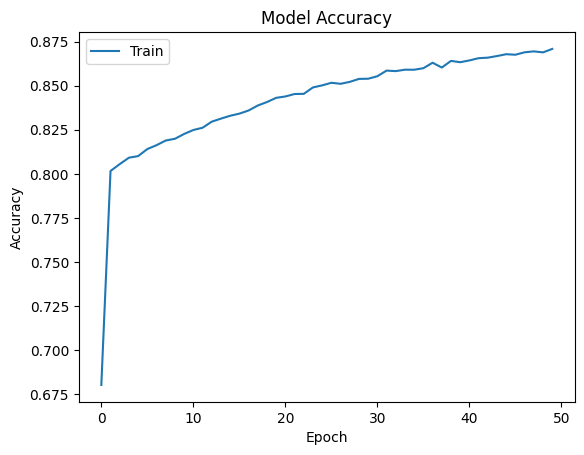

In [ ]:
# visualize the model Accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

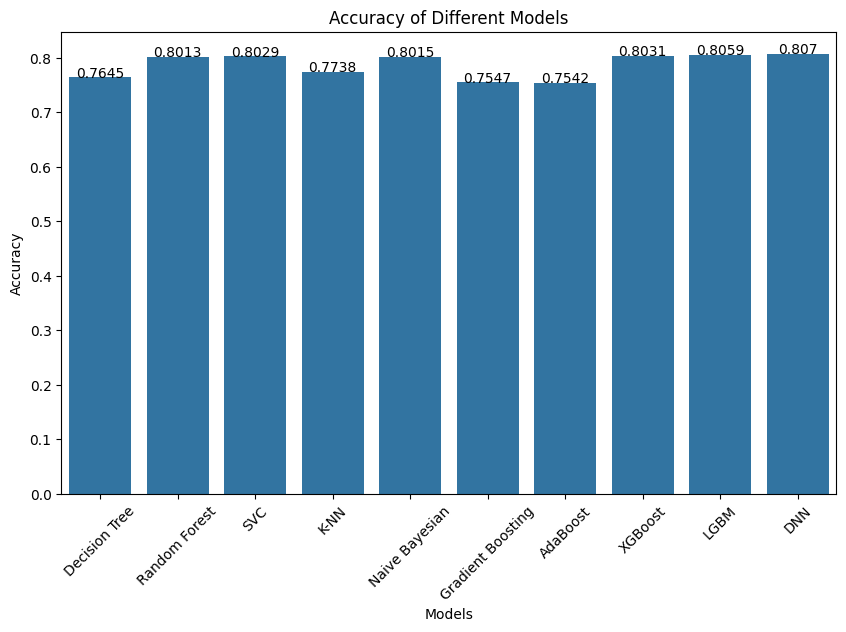

In [44]:
# visualize accuracy of different models
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Decision Tree', 'Random Forest', 'SVC', 'K-NN', 'Naive Bayesian', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'LGBM', 'DNN']
accuracy = [0.7645, 0.8013, 0.8029, 0.7738, 0.8015, 0.7547, 0.7542, 0.8031, 0.8059, 0.8070]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy)
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
# label
for i in range(len(models)):
    plt.text(i, accuracy[i], accuracy[i], ha = 'center')
plt.show()

# improve performance

In [ ]:
# do cross validation
from sklearn.model_selection import cross_val_score

dt_cv = cross_val_score(dt, tfidf_train, y_train, cv=5)
rf_cv = cross_val_score(rf, tfidf_train, y_train, cv=5)
svc_cv = cross_val_score(svc, tfidf_train, y_train, cv=5)
knn_cv = cross_val_score(knn, tfidf_train, y_train, cv=5)
nb_cv = cross_val_score(nb, tfidf_train, y_train, cv=5)
gb_cv = cross_val_score(gb, tfidf_train, y_train, cv=5)
ada_cv = cross_val_score(ada, tfidf_train, y_train, cv=5)
xgb_cv = cross_val_score(xgb, tfidf_train, y_train, cv=5)
lgbm_cv = cross_val_score(lgbm, tfidf_train, y_train, cv=5)

print ("Cross Validation Acc. of Decision Tree: {} %".format(round(dt_cv.mean() * 100, 2)))
print ("Cross Validation Acc. of Random Forest: {} %".format(round(rf_cv.mean() * 100, 2)))
print ("Cross Validation Acc. of SVC: {} %".format(round(svc_cv.mean() * 100, 2)))
print ("Cross Validation Acc. of K-NN: {} %".format(round(knn_cv.mean() * 100, 2)))
print ("Cross Validation Acc. of Naive Bayesian: {} %".format(round(nb_cv.mean() * 100, 2)))
print ("Cross Validation Acc. of Gradient Boosting: {} %".format(round(gb_cv.mean() * 100, 2)))
print ("Cross Validation Acc. of AdaBoost: {} %".format(round(ada_cv.mean() * 100, 2)))
print ("Cross Validation Acc. of XGBoost: {} %".format(round(xgb_cv.mean() * 100, 2)))
print ("Cross Validation Acc. of LGBM: {} %".format(round(lgbm_cv.mean() * 100, 2)))


## predict test dataset (headline provided in dataset)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer = word_tokenize, max_features = 300)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)
tfidf_features = tfidf_vectorizer.get_feature_names_out()

## construct models use word2vec

In [ ]:
# construct models use word2vec
